2.3.1
Python 3.8.3
(60000, 28, 28)
60000
(10000, 28, 28)
10000


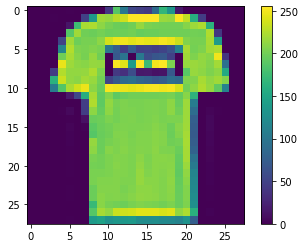

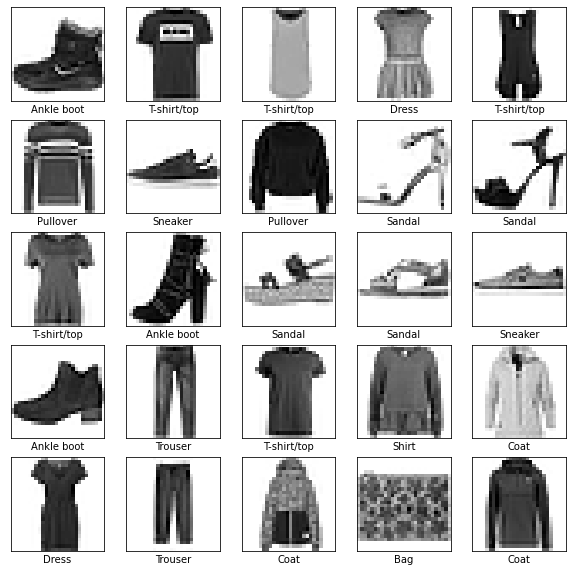

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4969 - accuracy: 0.8258
Epoch 2/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3718 - accuracy: 0.8663
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3352 - accuracy: 0.8779
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8860: 
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2953 - accuracy: 0.8902
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2798 - accuracy: 0.8963
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2682 - accuracy: 0.9007
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9050
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2489 - accuracy: 0.9071
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

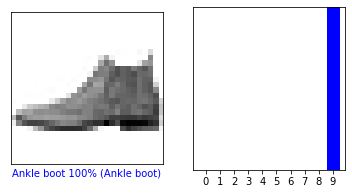

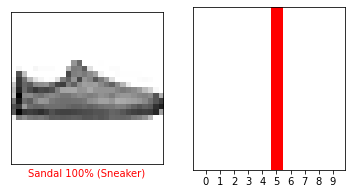

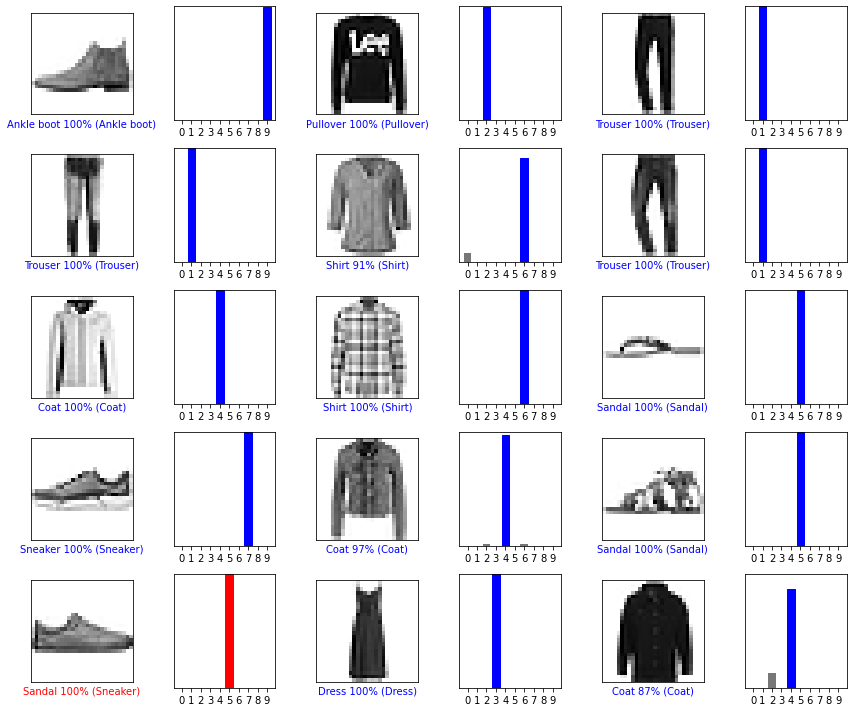

(1, 28, 28)
[[3.5376535e-05 5.3897072e-23 9.9843079e-01 4.9524077e-15 1.5182515e-03
  1.9920711e-17 1.5552163e-05 4.5811148e-32 4.5755588e-14 1.1148202e-23]]


2

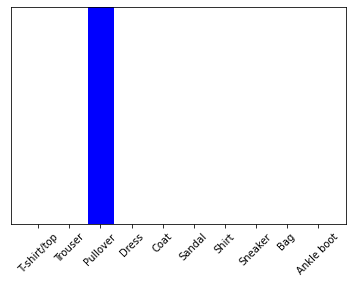

In [14]:
#Importing necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


#Check version
print(tf.__version__)
!python --version

#Importing fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Exploring the data
print(train_images.shape)
print(len(train_labels))

print(test_images.shape)
print(len(test_labels))

#displaying random image
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


#Pre-processing image
train_images = train_images/255.0
test_images = test_images/255.0

#Dsiplaying some images to make sure the data is preprocesed correctly
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


#---------------------BUILDING UP THE MODEL--------------------------#
#Setup the layer
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(128, activation='relu'), tf.keras.layers.Dense(10)])

#Compiling model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Feed the model
model.fit(train_images, train_labels, epochs=30)

#Evaluating accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nAccuracy = ", test_acc)

#Make predictions
predict_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = predict_model.predict(test_images)


#Function to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



#Verfying the predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

img = test_images[1]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

#Predicting the correct label for the image
predictions_single = predict_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


np.argmax(predictions_single[0])